¿Qué es K- means clustering?
El algoritmo  no supervisado k-means es un método de agrupamiento que divide un conjunto de datos en k grupos o clusters. Los datos se agrupan de tal manera que los puntos en el mismo clúster sean más similares entre sí que los puntos en otros clusters.


Algoritmo supervisados vs no supervisados.
Algoritmos supervisados (como la regresión o clasificación): Aprenden a partir de ejemplos etiquetados (es decir, tienes datos de entrada con etiquetas o valores objetivo) y luego pueden predecir una etiqueta o valor para nuevos datos que no han visto antes. 
El aprendizaje no supervisado, también conocido como machine learning no supervisado, utiliza algoritmos de machine learning para analizar y agrupar en clústeres conjuntos de datos sin etiquetar

 Funcionamiento básico.
 
 - Especificar el número de clústers deseados (k): El primer paso es especificar cuántos clúster queremos dividir el conjunto de datos. Este número se denomina k.
 - Seleccionar k puntos al azar del conjunto de datos como los centroides iniciales de cada clúster: Luego, se eligen k puntos al azar del conjunto de datos para servir como los centroides iniciales de cada clúster. Estos centroides son el punto central o el promedio de cada clúster.
 - Asignar cada punto del conjunto de datos al cluster cuyo centroide esté más cerca: A continuación, el algoritmo asigna cada punto del conjunto de datos al cluster cuyo centroide esté más cerca. Para hacer esto, se calcula la distancia entre cada punto y cada centroide y se asigna el punto al cluster cuyo centroide tenga la menor distancia.
 - Recalcular los centroides de cada cluster como la media de todos los puntos del cluster: Una vez que todos los puntos han sido asignados a un cluster, se recalculan los centroides de cada cluster como la media de todos los puntos del cluster. Esto significa que se actualiza la posición del centroide para reflejar la nueva agrupación.
 - Repetir los pasos 3 y 4 hasta que los centroides de los clusters ya no cambien o hasta que se alcance el número máximo de iteraciones.

¿Qué son los centroides?
Los centroides son como los líderes de cada grupo.
Imagina que estás haciendo una fiesta con un grupo de amigos. Si tú estás en el centro de la habitación (el centroide), todos los demás amigos se agrupan cerca de ti porque te consideran el "líder" del grupo.

Los centroides se calculan al principio y luego se ajustan para que estén en el medio de todos los puntos de su grupo. Es como encontrar el centro de una pelota.
Cada grupo tiene su propio centroide (su líder). Los puntos dentro del grupo estarán más cerca de su centroide que de cualquier otro.

Explicación del uso de modelo KMeans

Los centros comerciales y complejos comerciales a menudo compiten entre sí para aumentar su base de clientes y, por tanto, obtener enormes beneficios. Para lograr esta tarea, el aprendizaje automático ya se está aplicando en muchas tiendas. Es sorprendente darse cuenta de cómo el aprendizaje automático puede ayudar en tales ambiciones. La IA y el ML ya han estado íntimamente involucrados en las compras en línea desde, bueno, el comienzo de las compras en línea. No puede utilizar Amazon ni ningún otro servicio de compras sin recibir recomendaciones, que a menudo se personalizan según la comprensión que tiene el proveedor de sus características: su historial de compras, su historial de navegación y posiblemente mucho más. Los complejos comerciales utilizan los datos de sus clientes y desarrollan modelos de aprendizaje automático para dirigirse a los clientes adecuados. Esto no solo aumenta las ventas sino que también hace que su negocio sea eficiente.

Lo usaría para segmentar a los clientes según algunas característca en específco como por ejemplo según sus ingresos y gastos de las compras.

Dataset: https://www.kaggle.com/datasets/abdallahwagih/mall-customers-segmentation

In [1]:
#Importar las librerías necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix


In [2]:
#Cargar el dataset.
df = pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.shape# Para ver filas y columnas

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Seleccionar las variables para agrupar.

In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

Determinar el número optimo de clusters ((Elbow Method))

Usar el método del codo: El método del codo sigue siendo una técnica popular para encontrar el valor óptimo de k.

Para hacerlo, se grafican los valores de k junto con la suma de los errores cuadrados (SSE) para cada valor de k. El SSE es la suma de la distancia de cada punto al centroide de su cluster. A medida que aumenta k, el SSE disminuye, pero a un ritmo cada vez menor. El punto en el que el SSE disminuye más lentamente se conoce como el codo y es el punto óptimo para elegir k.

¿Por qué no uso matriz de confusión?
La matriz de confusión compara etiquetas predichas (como las asignadas por K-Means) con etiquetas reales. Sin embargo, en un algoritmo no supervisado como K-Means, no tienes etiquetas reales a menos que las hayas proporcionado.

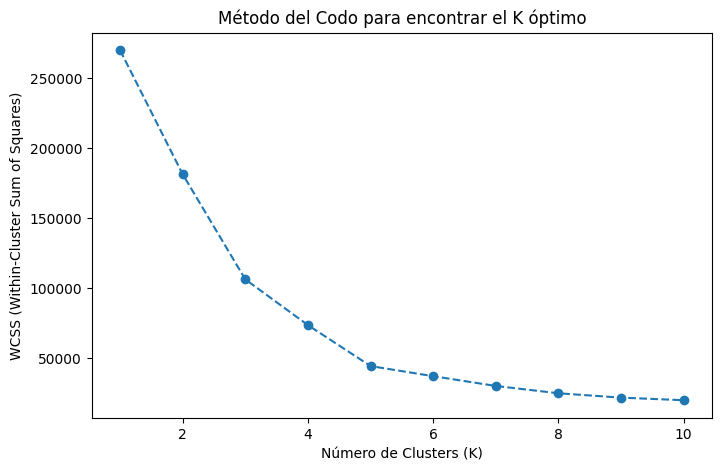

In [6]:
# Lista para almacenar la suma de los errores cuadráticos (WCSS)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Método del Codo para encontrar el K óptimo')
plt.show()


Para obtener el K más optimo podemos sacarlo apartir de este gráfico obteniendo el valor donde deja de descender mucho.
Por ejemplo podemos obtener un valor para K de 5.

Aplicamos el K más optimo
K = 5

In [7]:
#Aplico el k más optimo según la curvatura del gráfico anterior.
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)
print("Centroides de los clusters:\n", kmeans.cluster_centers_)


Centroides de los clusters:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


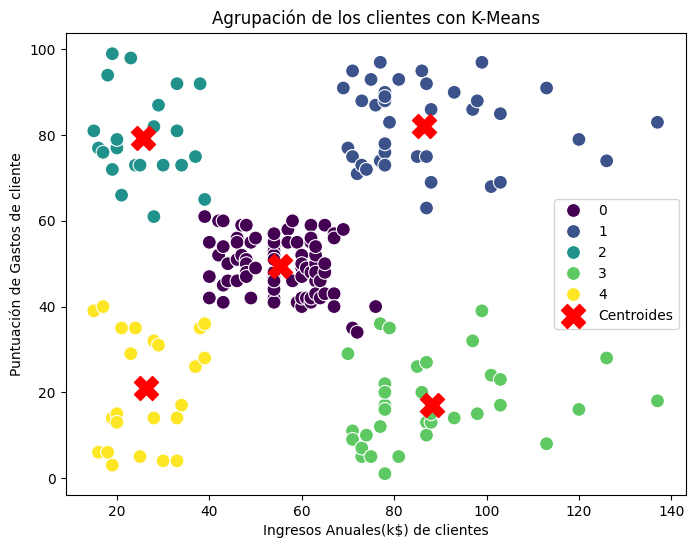

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], 
                hue=df['Cluster'], palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', label='Centroides', marker='X')
plt.xlabel('Ingresos Anuales(k$) de clientes')
plt.ylabel('Puntuación de Gastos de cliente')
plt.title('Agrupación de los clientes con K-Means')
plt.legend()
plt.show()


 - Cada punto del mismo color forma un grupo con los que tiene datos similares a el según ingreso y gastos.
 - La x reprenta el lider de cada grupo es decir el promedio de cada grupo.
Se agupan por ingreso y gasto por ejemplo un grupo de aquellos clientes que tienen un ingreso elevado pero que gastan poco otro grupo de clientes que gastan mucho pero sus ingresos son bajos.

Segun el gráfico:


 - Grupo azul claro: Gastan mucho y sus ingresos son bajos.
 - Grupo amarillo: Gastan poco y sus ingresos son bajos.
 - Grupo lila: No gastan ni mucho ni poco estan en la media y sus ingresos también.
 - Grupo verde: Gastan poco y sus ingresos son elevados.
- Grupo azul oscuro: Gastan mucho y sus ingresos son elevados.


Bibliografía:
 - Explicación: https://www.iebschool.com/blog/algoritmo-k-means-que-es-y-como-funciona-big-data/
 - Explicación: https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans.html#:~:text=K%2Dmeans%20es%20un%20algoritmo,de%20su%20grupo%20o%20cluster.
 - Funcionamiento con python(otro ejemplo): https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/
 - Dataset: https://www.kaggle.com/datasets/abdallahwagih/mall-customers-segmentation